<a href="https://colab.research.google.com/github/BalkisG77/pythoncode-tutorials/blob/master/TP_Sonar_12_neurones_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from tensorflow.python.ops.gen_data_flow_ops import tensor_array

In [2]:
sonar = pd.read_csv("/content/sonar.all-data.csv", header = None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


PREPARATION DES DONNEES

In [3]:
print("Nbr colonnes: ", len(sonar.columns))

Nbr colonnes:  61


In [4]:
#On ne prend que les données issues du sonar pour l'apprentissage
X = sonar[range(60)].values

In [5]:
#On ne prend que les libellé
y = sonar[60].values

In [6]:
#On encode : Les mines sont égales à 0 et les rochers égaux à 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [7]:
#On ajoute un encodage pour créer des classes :
# Si c'est une mine [1,0]
# Si c'est un rocher [0,1]
import numpy as np
n_labels = len(y)
n_unique_labels = len(np.unique(y))
one_hot_encode = np.zeros((n_labels, n_unique_labels))
one_hot_encode[np.arange(n_labels), y] = 1
Y = one_hot_encode

In [8]:
#Verification en prenant les enregistrement 0 et 97
print("Classe Rocher:",int(Y[0][1]))
print("Classe Mine :",int(Y[97][1]))

Classe Rocher: 1
Classe Mine : 0


# CREATION DES JEUX D'APPRENTISSAGE ET DE TEST

In [11]:
#On mélange
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=1)

#Creation des jeux d'apprentissage
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.07, random_state=42)

# PARAMETRAGE DU RESEAU DE  NEURONES

In [17]:
import tensorflow as tf

epochs = 300
nombre_neurones_entree = 60
nombre_neurones_sortie = 2
taux_apprentissage = 0.01

import tensorflow.compat.v1 as tf

In [21]:
pip uninstall tensorflow

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.4.1


In [28]:
pip install tensorflow

     |████████████████████████████████| 394.3MB 39kB/s 


In [40]:
pip install tensorflow-gpu==1.14

     |████████████████████████████████| 377.1MB 45kB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 3.2MB 43.0MB/s 
     |████████████████████████████████| 491kB 47.7MB/s 
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 1.14.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 1.14.0 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0


In [48]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#Variable TensorFLow correspondant aux 60 valeurs des neurones d'entrée
tf_neurones_entrees_X = tf.placeholder(tf.float32,[None, 60])

#Variable TensorFlow correspondant au 2 neurones de sortie
tf_valeurs_reelles_Y = tf.placeholder(tf.float32,[None, 2])


poids = {
    # 60 neurones d'entrées vers 24 Neurones de la couche cachée
    'couche_entree_vers_cachee': tf.Variable(tf.random_uniform([60, 12], minval=-0.3, maxval=0.3), tf.float32),

    # 12 neurones de la couche cachée vers 2 de la couche de sortie
    'couche_cachee_vers_sortie': tf.Variable(tf.random_uniform([12, 2], minval=-0.3, maxval=0.3), tf.float32),


}

poids_biais = {
     #1 biais de la couche d'entrée vers les 24 neurones de la couche cachée
    'poids_biais_couche_entree_vers_cachee': tf.Variable(tf.zeros([12]), tf.float32),

    #1 biais de la couche cachée vers les 2 neurones de la couche de sortie
    'poids_biais_couche_cachee_vers_sortie': tf.Variable(tf.zeros([2]), tf.float32),
}


Instructions for updating:
non-resource variables are not supported in the long term


In [49]:
def reseau_neurones_multicouches(sonar_en_entrees, poids, poids_biais):

    #Calcul de l'activation de la première couche
    premiere_activation = tf.sigmoid(tf.matmul(tf_neurones_entrees_X, poids['couche_entree_vers_cachee']) + poids_biais['poids_biais_couche_entree_vers_cachee'])

    #Calcul de l'activation de la seconde couche
    activation_couche_cachee = tf.sigmoid(tf.matmul(premiere_activation, poids['couche_cachee_vers_sortie']) + poids_biais['poids_biais_couche_cachee_vers_sortie'])

    return activation_couche_cachee

In [50]:
reseau = reseau_neurones_multicouches(tf_neurones_entrees_X, poids, poids_biais)


#---------------------------------------------
# ERREUR ET OPTIMISATION
#---------------------------------------------

#Fonction d'erreur de moyenne quadratique MSE
fonction_erreur = tf.reduce_sum(tf.pow(tf_valeurs_reelles_Y-reseau,2))

#Fonction de precision
fonction_precision = tf.metrics.accuracy(labels=tf_valeurs_reelles_Y,predictions=reseau)


#Descente de gradient avec un taux d'apprentissage fixé à 0.1
optimiseur = tf.train.GradientDescentOptimizer(learning_rate=taux_apprentissage).minimize(fonction_erreur)

 CREATION DU RESEAU DE NEURONES

In [51]:
reseau = reseau_neurones_multicouches(tf_neurones_entrees_X, poids, poids_biais)

ERREUR ET OPTIMISATION

In [52]:
#Fonction d'erreur de moyenne quadratique MSE
fonction_erreur = tf.reduce_sum(tf.pow(tf_valeurs_reelles_Y-reseau,2))

#Fonction de precision
fonction_precision = tf.metrics.accuracy(labels=tf_valeurs_reelles_Y,predictions=reseau)


#Descente de gradient avec un taux d'apprentissage fixé à 0.1
optimiseur = tf.train.GradientDescentOptimizer(learning_rate=taux_apprentissage).minimize(fonction_erreur)

# APPRENTISSAGE

EPOCH (0/300) -  MSE: 95.27215
EPOCH (1/300) -  MSE: 95.15721
EPOCH (2/300) -  MSE: 95.05417
EPOCH (3/300) -  MSE: 94.95063
EPOCH (4/300) -  MSE: 94.84611
EPOCH (5/300) -  MSE: 94.74013
EPOCH (6/300) -  MSE: 94.63228
EPOCH (7/300) -  MSE: 94.52211
EPOCH (8/300) -  MSE: 94.40921
EPOCH (9/300) -  MSE: 94.29315
EPOCH (10/300) -  MSE: 94.1735
EPOCH (11/300) -  MSE: 94.04984
EPOCH (12/300) -  MSE: 93.92177
EPOCH (13/300) -  MSE: 93.78883
EPOCH (14/300) -  MSE: 93.65064
EPOCH (15/300) -  MSE: 93.506775
EPOCH (16/300) -  MSE: 93.3568
EPOCH (17/300) -  MSE: 93.20028
EPOCH (18/300) -  MSE: 93.03683
EPOCH (19/300) -  MSE: 92.86601
EPOCH (20/300) -  MSE: 92.6874
EPOCH (21/300) -  MSE: 92.50059
EPOCH (22/300) -  MSE: 92.305145
EPOCH (23/300) -  MSE: 92.10069
EPOCH (24/300) -  MSE: 91.8868
EPOCH (25/300) -  MSE: 91.6631
EPOCH (26/300) -  MSE: 91.42919
EPOCH (27/300) -  MSE: 91.18471
EPOCH (28/300) -  MSE: 90.9293
EPOCH (29/300) -  MSE: 90.66263
EPOCH (30/300) -  MSE: 90.384384
EPOCH (31/300) -  MSE

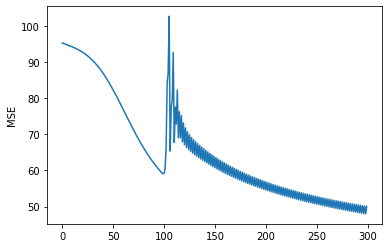

In [53]:
#Initialisation des variable
init = tf.global_variables_initializer()

#Demarrage d'une session d'apprentissage
session = tf.Session()
session.run(init)

#Pour la réalisation du graphique pour la MSE
Graphique_MSE=[]


#Pour chaque epoch
for i in range(epochs):

   #Realisation de l'apprentissage avec mise à jour des poids
   session.run(optimiseur, feed_dict = {tf_neurones_entrees_X: train_x, tf_valeurs_reelles_Y:train_y})

   #Calculer l'erreur d'apprentissage
   MSE = session.run(fonction_erreur, feed_dict = {tf_neurones_entrees_X: train_x, tf_valeurs_reelles_Y:train_y})

   #Affichage des informations
   Graphique_MSE.append(MSE)
   print("EPOCH (" + str(i) + "/" + str(epochs) + ") -  MSE: "+ str(MSE))


#Affichage graphique MSE
import matplotlib.pyplot as plt
plt.plot(Graphique_MSE)
plt.ylabel('MSE')
plt.show()

# VERIFICATION DE L'APPRENTISSAGE

In [54]:
#Les probabilités de chaque classe 'Mine' ou 'rocher' issues de l'apprentissage sont stockée dans le modèle.
#A l'aide de tf.argmax, on récupére les indexs des probabilités les plus elevées pour chaque sonar
#Ex: Si pour une observation nous avons [0.56, 0.89] renverra 1 car la valeur la plus élevée se trouve à l'index 1
#Ex : Si pour une observation nous avons [0.90, 0.34 ]  renverra 0 car la valeur la plus élevée se trouve à l'index 0
classifications = tf.argmax(reseau, 1)

#Dans le tableau des valeurs réelles :
#Les mines sont encodées comme suit [1,0] l'index ayant la plus grande valeur est 0
#Les rochers ont pour valeur [0,1] sl'index ayant la plus grande valeur est 1

#Si la classification est de [0.90, 0.34 ] l'index ayant la plus grande valeur est 0
#Si c'est une mine [1,0] l'index ayant la plus grande valeur est 0
#Si les deux index sont identiques alors on peut affirmer que c'est une bonne classification
formule_calcul_bonnes_classifications = tf.equal(classifications, tf.argmax(tf_valeurs_reelles_Y,1))


#La précision se calcul en faisant la moyenne (tf.mean)
# des bonnes classifications (aprés les avoir converties en décimale tf.cast, tf.float32)
formule_precision = tf.reduce_mean(tf.cast(formule_calcul_bonnes_classifications, tf.float32))


# PRECISION SUR LES DONNEES DE TESTS

In [55]:
nb_classifications = 0;
nb_bonnes_classifications = 0

#On parcours l'ensemble des données de test (text_x)
for i in range(0,test_x.shape[0]):

    #On récupere les informations
    donneesSonar = test_x[i].reshape(1,60)
    classificationAttendue = test_y[i].reshape(1,2)

    # On réalise la classification
    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X:donneesSonar})

    #On calcule la précision de la classification à l'aide de la formule établie auparavant
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X:donneesSonar, tf_valeurs_reelles_Y:classificationAttendue})


    #On affiche pour observation la classe originale et la classification réalisée
    print(i,"Classe attendue: ", int(session.run(tf_valeurs_reelles_Y[i][1],feed_dict={tf_valeurs_reelles_Y:test_y})), " Classification: ", prediction_run[0] )

    nb_classifications = nb_classifications+1
    if(accuracy_run*100 ==100):
        nb_bonnes_classifications = nb_bonnes_classifications+1


print("-------------")
print("Précision sur les donnees de tests = "+str((nb_bonnes_classifications/nb_classifications)*100)+"%")


#-------------------------------------------------------------------------
# PRECISION SUR LES DONNEES D'APPRENTISSAGE
#-------------------------------------------------------------------------

nb_classifications = 0;
nb_bonnes_classifications = 0
for i in range(0,train_x.shape[0]):

    # On récupere les informations
    donneesSonar = train_x[i].reshape(1, 60)
    classificationAttendue = train_y[i].reshape(1, 2)

    # On réalise la classification
    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X: donneesSonar})

    # On calcule la précision de la classification à l'aide de la formule établie auparavant
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X: donneesSonar, tf_valeurs_reelles_Y: classificationAttendue})

    nb_classifications = nb_classifications + 1
    if (accuracy_run * 100 == 100):
        nb_bonnes_classifications = nb_bonnes_classifications + 1


print("Précision sur les donnees d'apprentissage = " + str((nb_bonnes_classifications / nb_classifications) * 100) + "%")

0 Classe attendue:  0  Classification:  0
1 Classe attendue:  1  Classification:  0
2 Classe attendue:  1  Classification:  0
3 Classe attendue:  0  Classification:  0
4 Classe attendue:  1  Classification:  0
5 Classe attendue:  1  Classification:  0
6 Classe attendue:  1  Classification:  0
7 Classe attendue:  1  Classification:  0
8 Classe attendue:  1  Classification:  0
9 Classe attendue:  1  Classification:  1
10 Classe attendue:  0  Classification:  0
11 Classe attendue:  1  Classification:  1
12 Classe attendue:  0  Classification:  0
13 Classe attendue:  1  Classification:  1
14 Classe attendue:  1  Classification:  0
-------------
Précision sur les donnees de tests = 46.666666666666664%
Précision sur les donnees d'apprentissage = 81.86528497409327%


# PRECISION SUR L'ENSEMBLE DES DONNEES

In [56]:
nb_classifications = 0;
nb_bonnes_classifications = 0
for i in range(0,207):

    prediction_run = session.run(classifications, feed_dict={tf_neurones_entrees_X:X[i].reshape(1,60)})
    accuracy_run = session.run(formule_precision, feed_dict={tf_neurones_entrees_X:X[i].reshape(1,60), tf_valeurs_reelles_Y:Y[i].reshape(1,2)})

    nb_classifications = nb_classifications + 1
    if (accuracy_run * 100 == 100):
        nb_bonnes_classifications = nb_bonnes_classifications + 1


print("Précision sur l'ensemble des données = " + str((nb_bonnes_classifications / nb_classifications) * 100) + "%")




session.close()

Précision sur l'ensemble des données = 79.22705314009661%
